url DATA: https://www.kaggle.com/datasets/rohitudageri/credit-card-details
Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.

In [50]:
# Importo librerias de utilidad.
import pandas as pd
import numpy as np
import random as rd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn as sk
import statsmodels.stats.api as sms 
from scipy import stats
import statsmodels.api as sm
import altair as alt
import plotly as px 

In [51]:
# Lectura de df.
df = pd.read_csv("Credit_card.csv")

In [52]:
# Lectura de etiquetas.
label = pd.read_csv("Credit_card_label.csv")

In [53]:
# Creando nuevo df con etiquetas.
df = df.merge(label, on ="Ind_ID", how= "left")

In [54]:
# cantindad de registros y atributos.
df.shape

(1548, 19)

In [11]:
df.sample()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
941,5010683,M,Y,Y,0,292500.0,Working,Higher education,Married,House / apartment,-10297.0,-2231,1,0,0,0,Managers,2,0


In [8]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [9]:
# Analisis estadistico de variables numericas.
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [14]:
df.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [13]:
# elminando registros con datos faltantes.
df.dropna(inplace=True)

ANALISIS DEL DATA FRAME.

Media de ingresos anuales.

In [15]:
avarge_income = df["Annual_income"].mean()
avarge_income

200110.46048780487

Media de ingresos por genero, teniendo los hombres mas ingresos.

In [18]:
gender_income = df.groupby("GENDER")["Annual_income"].mean()
gender_income

GENDER
F    180881.462687
M    227586.966825
Name: Annual_income, dtype: float64

Cantidad de tarjetas de credito aprobados y rechazados.

In [19]:
label_counts = df["label"].value_counts()
label_counts

label
0    915
1    110
Name: count, dtype: int64

Text(0.5, 1.0, 'Porcentaje de tarjetas de credito otorgadas')

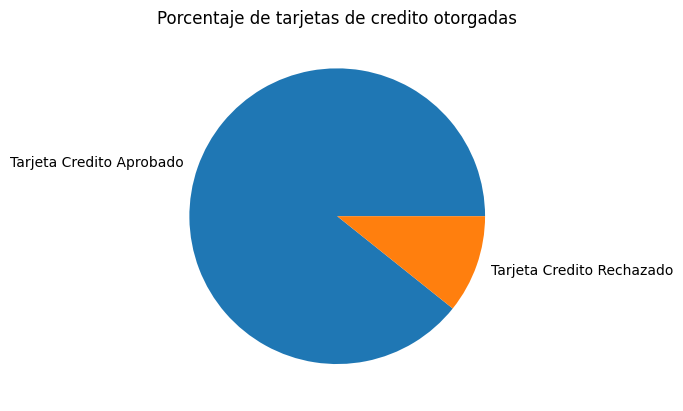

In [21]:
plt.pie(label_counts, labels =["Tarjeta Credito Aprobado", "Tarjeta Credito Rechazado"])
plt.title("Porcentaje de tarjetas de credito otorgadas")

Analisis de media en ingresos segun el rubro.

In [23]:
df.groupby("Type_Income")["Annual_income"].mean()

Type_Income
Commercial associate    233367.086331
Pensioner               285300.000000
State servant           216927.835052
Working                 182587.088372
Name: Annual_income, dtype: float64

Analisis de media en ingresos segun la educacion.

In [25]:
df.groupby("EDUCATION")["Annual_income"].mean()

EDUCATION
Higher education                 235861.016949
Incomplete higher                205134.146341
Lower secondary                  144375.000000
Secondary / secondary special    185215.985229
Name: Annual_income, dtype: float64

Analisis de media en ingresos segun su estado civil.

In [31]:
Marital_income = df.groupby("Marital_status")["Annual_income"].mean()
Marital_income_sorted = Marital_income.sort_values(ascending=False)
Marital_income_sorted

Marital_status
Single / not married    216173.076923
Civil marriage          212610.000000
Married                 196685.974825
Separated               192600.000000
Widow                   175875.000000
Name: Annual_income, dtype: float64

Reducimos el data frame para trabajar con variables significativas.

In [33]:
df = df[["Car_Owner","Propert_Owner","Annual_income","EDUCATION","label"]]

Transofrmacion de variables categoricas a numeros enteros.

In [34]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [35]:
df["Car_Owner"] = labelencoder.fit_transform(df["Car_Owner"])
df["Propert_Owner"] = labelencoder.fit_transform(df["Propert_Owner"])
df["EDUCATION"] = labelencoder.fit_transform(df["EDUCATION"])

Definimoms variable independiente (labels).

In [37]:
X = df.iloc[:, : -1]

Definimos variables dependientes.

In [38]:
y = df.iloc[:, -1]

Creamos grupos de entrenamiento y de prueba.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

Estandarizamos los datos.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

Definimos funcion para poder visualizar el porcentaje de acierto de nuestro modelo.

In [45]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print("La precisión de nuestro modelo es: {}".format(accuracy_score(y_test, predictions)))

Seleccion de modelo (Regresion lineal).

In [46]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

# Entrenamos el modelo.
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [47]:
log_predictions = log_model.predict(scaled_X_test)

In [48]:
modelperformance(log_predictions)

La precisión de nuestro modelo es: 0.848780487804878


Probemos con el modelo de arboles de decision.

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3]
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid)


Entrenamos el modelo de arboles de decision.

In [60]:
grid_search_tree.fit(scaled_X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

Buscamos los mejores hiperparametros.

In [61]:
grid_search_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

Probamos nuestro modelo.

In [62]:
preds = grid_search_tree.predict(scaled_X_test)

In [63]:
modelperformance(preds)

La precisión de nuestro modelo es: 0.8390243902439024
